In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os
from functools import partial
from multiprocessing import Pool

from fastdtw import fastdtw, dtw
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix 
from custom.graphics import plot_context

In [2]:
reduced = pd.read_csv("reduced.csv", index_col="date")
df = reduced.apply(np.log).diff()[1:]
print(df.columns)
data = np.array(df.iloc[0:969])
data

Index(['ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEE', 'AEP',
       ...
       'WYNN', 'XEL', 'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM',
       'ZION'],
      dtype='object', length=368)


array([[ 0.00620763,  0.0109497 , -0.00973507, ..., -0.01390149,
        -0.00217596, -0.01752509],
       [-0.01361507, -0.00678224, -0.0136801 , ..., -0.023975  ,
        -0.01212667, -0.02197072],
       [ 0.01063102, -0.00663824,  0.0093228 , ...,  0.00366973,
         0.04441981,  0.01383458],
       ...,
       [ 0.00122945, -0.00459085, -0.00654261, ...,  0.0184337 ,
         0.00455296, -0.00263694],
       [-0.00230645,  0.00287175, -0.00863838, ...,  0.00119048,
         0.00046981, -0.0147506 ],
       [ 0.00184559,  0.00526257, -0.00297245, ...,  0.00966954,
         0.01059035,  0.01090259]])

In [3]:
L = len(data)
l = 20
s = 1
m = len(data[0])

X_train = np.stack([data[i:i + l] for i in range(L // 2 - l - s)])
Y_train = np.empty((L//2 - l - s, m))
for i in range(L//2 - l - s):
    for j in range(m):
        Y_train[i][j] = (data[i + l + s - 1][j] > data[i + l - 1][j]).astype(np.float32)
    

X_test = np.stack([data[i:i + l] for i in range(L // 2, L - l - s)])

d = L - l - s - L//2
Y_test = np.empty((d, m))
for i in range(L // 2, L - l - s):
    for j in range(m):
        Y_test[i - L//2][j] = (data[i + l + s - 1][j] > data[i + l - 1][j]).astype(np.float32)
    


In [11]:
kernel_train = np.load("kernel_train.npy")

In [12]:
kernel_test = np.load("kernel_test.npy")

In [13]:
c = 10
gamma = 25
kernel = np.exp(-kernel_train/gamma)
testkernel = np.exp(-kernel_test/gamma)
clf = svm.SVC(kernel='precomputed', C=c)
for i in range(data.shape[1]):
    if df.columns[i] == "ABBV":
        clf.fit(kernel, Y_train[:, i])
        print('dionica: ', df.columns[i])
        res1 = clf.predict(testkernel)
        print('accuracy test:', np.mean(res1 == Y_test[:, i]))
        print('AUC test:', roc_auc_score(Y_test[:, i], res1))
        Y1 = Y_test[:, i]
        
    elif df.columns[i] == "GOOGL":
        clf.fit(kernel, Y_train[:, i])
        print('dionica: ', df.columns[i])
        res2 = clf.predict(testkernel)
        print('accuracy test:', np.mean(res2 == Y_test[:, i]))
        print('AUC test:', roc_auc_score(Y_test[:, i], res2))
        Y2 = Y_test[:, i]
        
    elif df.columns[i] == "HP":
        clf.fit(kernel, Y_train[:, i])
        print('dionica: ', df.columns[i])
        res3 = clf.predict(testkernel)
        print('accuracy test:', np.mean(res3 == Y_test[:, i]))
        print('AUC test:', roc_auc_score(Y_test[:, i], res3))
        Y3 = Y_test[:, i]
        
    elif df.columns[i] == "KO":
        clf.fit(kernel, Y_train[:, i])
        print('dionica: ', df.columns[i])
        res4 = clf.predict(testkernel)
        print('accuracy test:', np.mean(res4 == Y_test[:, i]))
        print('AUC test:', roc_auc_score(Y_test[:, i], res4))
        Y4 = Y_test[:, i]
        
    elif df.columns[i] == "NKE":
        clf.fit(kernel, Y_train[:, i])
        print('dionica: ', df.columns[i])
        res5 = clf.predict(testkernel)
        print('accuracy test:', np.mean(res5 == Y_test[:, i]))
        print('AUC test:', roc_auc_score(Y_test[:, i], res5))
        Y5 = Y_test[:, i]
        
    elif df.columns[i] == "F":
        clf.fit(kernel, Y_train[:, i])
        print('dionica: ', df.columns[i])
        res6 = clf.predict(testkernel)
        print('accuracy test:', np.mean(res6 == Y_test[:, i]))
        print('AUC test:', roc_auc_score(Y_test[:, i], res6))
        Y6 = Y_test[:, i]

dionica:  ABBV
accuracy test: 0.5711206896551724
AUC test: 0.5719901856911838
dionica:  F
accuracy test: 0.6573275862068966
AUC test: 0.6573275862068966
dionica:  GOOGL
accuracy test: 0.5883620689655172
AUC test: 0.5901502193797873
dionica:  HP
accuracy test: 0.6487068965517241
AUC test: 0.6492659509145376
dionica:  KO
accuracy test: 0.6120689655172413
AUC test: 0.6126488095238095
dionica:  NKE
accuracy test: 0.6336206896551724
AUC test: 0.632471008028546


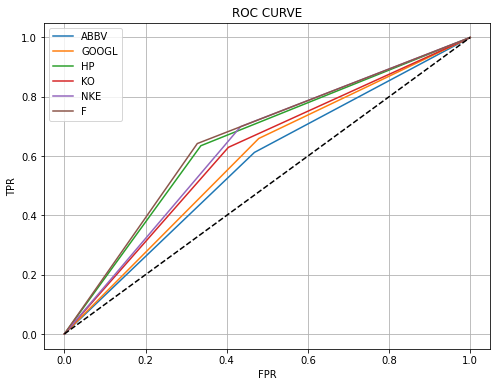

AUC ABBV: 0.5719901856911838
AUC GOOGL: 0.5901502193797873
AUC HP: 0.6492659509145376
AUC KO: 0.6126488095238095
AUC NKE: 0.632471008028546


In [14]:
with plot_context(show=True, grid=True, title="ROC CURVE", xlabel="FPR", ylabel="TPR", legend=["ABBV", "GOOGL", "HP", "KO", "NKE", "F"]):
    fpr, tpr, _ = roc_curve(Y1, res1)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y2, res2)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y3, res3)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y4, res4)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y5, res5)
    plt.plot(fpr, tpr)
    fpr, tpr, _ = roc_curve(Y6, res6)
    plt.plot(fpr, tpr)
    
    plt.plot([0, 1], [0, 1], "k--", label="_nolegend_")
print('AUC ABBV:', roc_auc_score(Y1, res1))
print('AUC GOOGL:', roc_auc_score(Y2, res2))
print('AUC HP:', roc_auc_score(Y3, res3))
print('AUC KO:', roc_auc_score(Y4, res4))
print('AUC NKE:', roc_auc_score(Y5, res5))